<a href="https://colab.research.google.com/github/Minsoo1036/DeepLearning-and-PyTorch/blob/main/Chapter3_MLP_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms, datasets

# 모델 정의

In [2]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(28*28,512)
        self.fc2 = nn.Linear(512,256)
        self.fc3 = nn.Linear(256,10)

    def forward(self,x):
        x = x.view(-1,28*28)
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = self.fc2(x)
        x = F.sigmoid(x)
        x = self.fc3(x)
        x = F.log_softmax(x,dim=1)
        return x

In [18]:
class Net_drop(nn.Module):
    def __init__(self):
        super(Net_drop,self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256,10)
        self.dropout_prob = 0.5

    def forward(self,x):
        x = x.view(-1,28*28)
        x = self.fc1(x)
        x = F.sigmoid(x)
        x = F.dropout(x,training = self.training, p = self.dropout_prob)
        x = self.fc2(x)
        x = F.sigmoid(x)
        x = F.dropout(x,training = self.training, p = self.dropout_prob)
        x = self.fc3(x)
        x = F.log_softmax(x,dim=1)
        return x

In [22]:
class Net_drop_relu(nn.Module):
    def __init__(self):
        super(Net_drop_relu,self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256,10)
        self.dropout_prob = 0.5

    def forward(self,x):
        x = x.view(-1,28*28)
        x = self.fc1(x)
        x = F.relu(x)
        x = F.dropout(x,training = self.training, p = self.dropout_prob)
        x = self.fc2(x)
        x = F.relu(x)
        x = F.dropout(x,training = self.training, p = self.dropout_prob)
        x = self.fc3(x)
        x = F.log_softmax(x,dim=1)
        return x

In [23]:
class Net_drop_relu_bn(nn.Module):
    def __init__(self):
        super(Net_drop_relu_bn,self).__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256,10)
        self.dropout_prob = 0.5
        self.batch_norm1 = nn.BatchNorm1d(512)
        self.batch_norm2 = nn.BatchNorm1d(256)

    def forward(self,x):
        x = x.view(-1,28*28)
        x = self.fc1(x)
        x = self.batch_norm1(x)
        x = F.relu(x)
        x = F.dropout(x,training = self.training, p = self.dropout_prob)
        x = self.fc2(x)
        x = self.batch_norm2(x)
        x = F.relu(x)
        x = F.dropout(x,training = self.training, p = self.dropout_prob)
        x = self.fc3(x)
        x = F.log_softmax(x,dim=1)
        return x

# GPU 셋팅 및 모델 훈련 시작

In [4]:
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')

print('Using PyTorch version:',torch.__version__,' Device:',DEVICE)

Using PyTorch version: 1.11.0+cu113  Device: cuda


In [5]:
BATCH_SIZE = 32
EPOCHS = 10

In [6]:
train_dataset = datasets.MNIST(root="../data/MNIST",
                               train = True,
                               download = True,
                               transform = transforms.ToTensor())

test_dataset = datasets.MNIST(root="../data/MNIST",
                              train = False,
                              transform = transforms.ToTensor())



  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ../data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ../data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ../data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ../data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw



In [7]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = False)

In [8]:
for (X_train,y_train) in train_loader:
    print('X_train:',X_train.size(),'type:',X_train.type())
    print('y_train:',y_train.size(),'type:',y_train.type())
    break

X_train: torch.Size([32, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([32]) type: torch.LongTensor


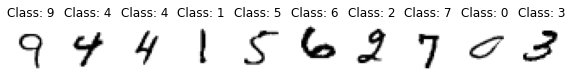

In [9]:
pltsize = 1
plt.figure(figsize = (10*pltsize, pltsize))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.axis('off')
    plt.imshow(X_train[i,:,:,:].numpy().reshape(28,28),cmap="gray_r")
    plt.title('Class: '+str(y_train[i].item()))

In [10]:
model = Net().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum = 0.5)
criterion = nn.CrossEntropyLoss()

In [14]:
def train(model,train_loader, optimizer,log_interval):
    model.train()
    for batch_idx, (image, label) in enumerate(train_loader):
        image = image.to(DEVICE)
        label = label.to(DEVICE)
        optimizer.zero_grad()
        output = model(image)
        loss = criterion(output,label)
        loss.backward()
        optimizer.step()

        if batch_idx % log_interval == 0 :
            print("Train Epoch: {} [{}/{}({:.0f}%)]\tTrain Loss: {:.6f}".format(
                Epoch, batch_idx*len(image),
                len(train_loader.dataset), 100.*batch_idx/len(train_loader), loss.item()
            ))


In [15]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0

    with torch.no_grad():
        for image, label in test_loader:
            image = image.to(DEVICE)
            label = label.to(DEVICE)
            output = model(image)
            test_loss += criterion(output, label).item()
            prediction = output.max(1, keepdim = True)[1]
            correct += prediction.eq(label.view_as(prediction)).sum().item()

    test_loss /= len(test_loader.dataset)
    test_accuracy = 100. * correct / len(test_loader.dataset)
    return test_loss, test_accuracy

In [16]:
for Epoch in range(1, EPOCHS+1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} %\n".format(
        Epoch, test_loss, test_accuracy
    ))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Train Epoch: 1 [0/60000(0%)]	Train Loss: 2.394412
Train Epoch: 1 [6400/60000(11%)]	Train Loss: 2.278132
Train Epoch: 1 [12800/60000(21%)]	Train Loss: 2.348258
Train Epoch: 1 [19200/60000(32%)]	Train Loss: 2.305879
Train Epoch: 1 [25600/60000(43%)]	Train Loss: 2.266206
Train Epoch: 1 [32000/60000(53%)]	Train Loss: 2.269212
Train Epoch: 1 [38400/60000(64%)]	Train Loss: 2.203761
Train Epoch: 1 [44800/60000(75%)]	Train Loss: 2.287138
Train Epoch: 1 [51200/60000(85%)]	Train Loss: 2.259670
Train Epoch: 1 [57600/60000(96%)]	Train Loss: 2.241610

[EPOCH: 1], 	Test Loss: 0.0699, 	Test Accuracy: 33.93 %

Train Epoch: 2 [0/60000(0%)]	Train Loss: 2.286821
Train Epoch: 2 [6400/60000(11%)]	Train Loss: 2.205814
Train Epoch: 2 [12800/60000(21%)]	Train Loss: 2.218975
Train Epoch: 2 [19200/60000(32%)]	Train Loss: 2.046986
Train Epoch: 2 [25600/60000(43%)]	Train Loss: 2.068913
Train Epoch: 2 [32000/60000(53%)]	Train Loss: 1.810315
Train Epoch: 2 [38400/60000(64%)]	Train Loss: 1.706776
Train Epoch: 2 [448

# DropOut 적용시

In [19]:
model = Net_drop().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum = 0.5)
criterion = nn.CrossEntropyLoss()

In [20]:
for Epoch in range(1, EPOCHS+1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} %\n".format(
        Epoch, test_loss, test_accuracy
    ))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1944: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


Train Epoch: 1 [0/60000(0%)]	Train Loss: 2.246624
Train Epoch: 1 [6400/60000(11%)]	Train Loss: 2.318597
Train Epoch: 1 [12800/60000(21%)]	Train Loss: 2.351707
Train Epoch: 1 [19200/60000(32%)]	Train Loss: 2.336045
Train Epoch: 1 [25600/60000(43%)]	Train Loss: 2.289584
Train Epoch: 1 [32000/60000(53%)]	Train Loss: 2.275401
Train Epoch: 1 [38400/60000(64%)]	Train Loss: 2.322458
Train Epoch: 1 [44800/60000(75%)]	Train Loss: 2.310290
Train Epoch: 1 [51200/60000(85%)]	Train Loss: 2.340199
Train Epoch: 1 [57600/60000(96%)]	Train Loss: 2.305002

[EPOCH: 1], 	Test Loss: 0.0714, 	Test Accuracy: 10.10 %

Train Epoch: 2 [0/60000(0%)]	Train Loss: 2.213193
Train Epoch: 2 [6400/60000(11%)]	Train Loss: 2.273992
Train Epoch: 2 [12800/60000(21%)]	Train Loss: 2.271144
Train Epoch: 2 [19200/60000(32%)]	Train Loss: 2.299335
Train Epoch: 2 [25600/60000(43%)]	Train Loss: 2.196298
Train Epoch: 2 [32000/60000(53%)]	Train Loss: 2.281122
Train Epoch: 2 [38400/60000(64%)]	Train Loss: 2.161765
Train Epoch: 2 [448

# 활성함수를 relu로 변경

In [24]:
model = Net_drop_relu().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum = 0.5)
criterion = nn.CrossEntropyLoss()

In [25]:
for Epoch in range(1, EPOCHS+1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} %\n".format(
        Epoch, test_loss, test_accuracy
    ))

Train Epoch: 1 [0/60000(0%)]	Train Loss: 2.311617
Train Epoch: 1 [6400/60000(11%)]	Train Loss: 1.987435
Train Epoch: 1 [12800/60000(21%)]	Train Loss: 1.112685
Train Epoch: 1 [19200/60000(32%)]	Train Loss: 0.748052
Train Epoch: 1 [25600/60000(43%)]	Train Loss: 0.814144
Train Epoch: 1 [32000/60000(53%)]	Train Loss: 0.397297
Train Epoch: 1 [38400/60000(64%)]	Train Loss: 0.572066
Train Epoch: 1 [44800/60000(75%)]	Train Loss: 0.368561
Train Epoch: 1 [51200/60000(85%)]	Train Loss: 0.338239
Train Epoch: 1 [57600/60000(96%)]	Train Loss: 0.241309

[EPOCH: 1], 	Test Loss: 0.0099, 	Test Accuracy: 91.01 %

Train Epoch: 2 [0/60000(0%)]	Train Loss: 0.553085
Train Epoch: 2 [6400/60000(11%)]	Train Loss: 0.473774
Train Epoch: 2 [12800/60000(21%)]	Train Loss: 0.498463
Train Epoch: 2 [19200/60000(32%)]	Train Loss: 0.336100
Train Epoch: 2 [25600/60000(43%)]	Train Loss: 0.547005
Train Epoch: 2 [32000/60000(53%)]	Train Loss: 0.287441
Train Epoch: 2 [38400/60000(64%)]	Train Loss: 0.196615
Train Epoch: 2 [448

# BN (Batch Normalization)을 추가

In [26]:
model = Net_drop_relu_bn().to(DEVICE)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum = 0.5)
criterion = nn.CrossEntropyLoss()

In [27]:
for Epoch in range(1, EPOCHS+1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} %\n".format(
        Epoch, test_loss, test_accuracy
    ))

Train Epoch: 1 [0/60000(0%)]	Train Loss: 2.491569
Train Epoch: 1 [6400/60000(11%)]	Train Loss: 0.613199
Train Epoch: 1 [12800/60000(21%)]	Train Loss: 0.320476
Train Epoch: 1 [19200/60000(32%)]	Train Loss: 0.354099
Train Epoch: 1 [25600/60000(43%)]	Train Loss: 0.517189
Train Epoch: 1 [32000/60000(53%)]	Train Loss: 0.399137
Train Epoch: 1 [38400/60000(64%)]	Train Loss: 0.283254
Train Epoch: 1 [44800/60000(75%)]	Train Loss: 0.507098
Train Epoch: 1 [51200/60000(85%)]	Train Loss: 0.528861
Train Epoch: 1 [57600/60000(96%)]	Train Loss: 0.318640

[EPOCH: 1], 	Test Loss: 0.0047, 	Test Accuracy: 95.63 %

Train Epoch: 2 [0/60000(0%)]	Train Loss: 0.331100
Train Epoch: 2 [6400/60000(11%)]	Train Loss: 0.539864
Train Epoch: 2 [12800/60000(21%)]	Train Loss: 0.451282
Train Epoch: 2 [19200/60000(32%)]	Train Loss: 0.235944
Train Epoch: 2 [25600/60000(43%)]	Train Loss: 0.147896
Train Epoch: 2 [32000/60000(53%)]	Train Loss: 0.192482
Train Epoch: 2 [38400/60000(64%)]	Train Loss: 0.150256
Train Epoch: 2 [448

# He Uniform Initialization

In [28]:
import torch.nn.init as init
def weight_init(m):
    if isinstance(m,nn.Linear):
        init.kaiming_uniform_(m.weight.data)

model = Net_drop_relu_bn().to(DEVICE)
model.apply(weight_init)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
criterion = nn.CrossEntropyLoss()

In [29]:
for Epoch in range(1, EPOCHS+1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} %\n".format(
        Epoch, test_loss, test_accuracy
    ))

Train Epoch: 1 [0/60000(0%)]	Train Loss: 3.129279
Train Epoch: 1 [6400/60000(11%)]	Train Loss: 0.886644
Train Epoch: 1 [12800/60000(21%)]	Train Loss: 0.771272
Train Epoch: 1 [19200/60000(32%)]	Train Loss: 0.515370
Train Epoch: 1 [25600/60000(43%)]	Train Loss: 0.505546
Train Epoch: 1 [32000/60000(53%)]	Train Loss: 0.640076
Train Epoch: 1 [38400/60000(64%)]	Train Loss: 0.635422
Train Epoch: 1 [44800/60000(75%)]	Train Loss: 0.330384
Train Epoch: 1 [51200/60000(85%)]	Train Loss: 0.466848
Train Epoch: 1 [57600/60000(96%)]	Train Loss: 0.239772

[EPOCH: 1], 	Test Loss: 0.0068, 	Test Accuracy: 93.63 %

Train Epoch: 2 [0/60000(0%)]	Train Loss: 0.444386
Train Epoch: 2 [6400/60000(11%)]	Train Loss: 0.205628
Train Epoch: 2 [12800/60000(21%)]	Train Loss: 0.324223
Train Epoch: 2 [19200/60000(32%)]	Train Loss: 0.130294
Train Epoch: 2 [25600/60000(43%)]	Train Loss: 0.445667
Train Epoch: 2 [32000/60000(53%)]	Train Loss: 0.230260
Train Epoch: 2 [38400/60000(64%)]	Train Loss: 0.585362
Train Epoch: 2 [448

# Adam Optimizer

In [30]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = nn.CrossEntropyLoss()

In [31]:
for Epoch in range(1, EPOCHS+1):
    train(model, train_loader, optimizer, log_interval = 200)
    test_loss, test_accuracy = evaluate(model, test_loader)
    print("\n[EPOCH: {}], \tTest Loss: {:.4f}, \tTest Accuracy: {:.2f} %\n".format(
        Epoch, test_loss, test_accuracy
    ))

Train Epoch: 1 [0/60000(0%)]	Train Loss: 0.178882
Train Epoch: 1 [6400/60000(11%)]	Train Loss: 0.209006
Train Epoch: 1 [12800/60000(21%)]	Train Loss: 0.373529
Train Epoch: 1 [19200/60000(32%)]	Train Loss: 0.384889
Train Epoch: 1 [25600/60000(43%)]	Train Loss: 0.352548
Train Epoch: 1 [32000/60000(53%)]	Train Loss: 0.378549
Train Epoch: 1 [38400/60000(64%)]	Train Loss: 0.210785
Train Epoch: 1 [44800/60000(75%)]	Train Loss: 0.127329
Train Epoch: 1 [51200/60000(85%)]	Train Loss: 0.409810
Train Epoch: 1 [57600/60000(96%)]	Train Loss: 0.297656

[EPOCH: 1], 	Test Loss: 0.0044, 	Test Accuracy: 95.80 %

Train Epoch: 2 [0/60000(0%)]	Train Loss: 0.127000
Train Epoch: 2 [6400/60000(11%)]	Train Loss: 0.106597
Train Epoch: 2 [12800/60000(21%)]	Train Loss: 0.218609
Train Epoch: 2 [19200/60000(32%)]	Train Loss: 0.134625
Train Epoch: 2 [25600/60000(43%)]	Train Loss: 0.178114
Train Epoch: 2 [32000/60000(53%)]	Train Loss: 0.126646
Train Epoch: 2 [38400/60000(64%)]	Train Loss: 0.171635
Train Epoch: 2 [448